<center><p float="center">
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Engineering</center></font>
<center><font size=6>Hotel Booking Cancellation Prediction using Data Science</center></font>

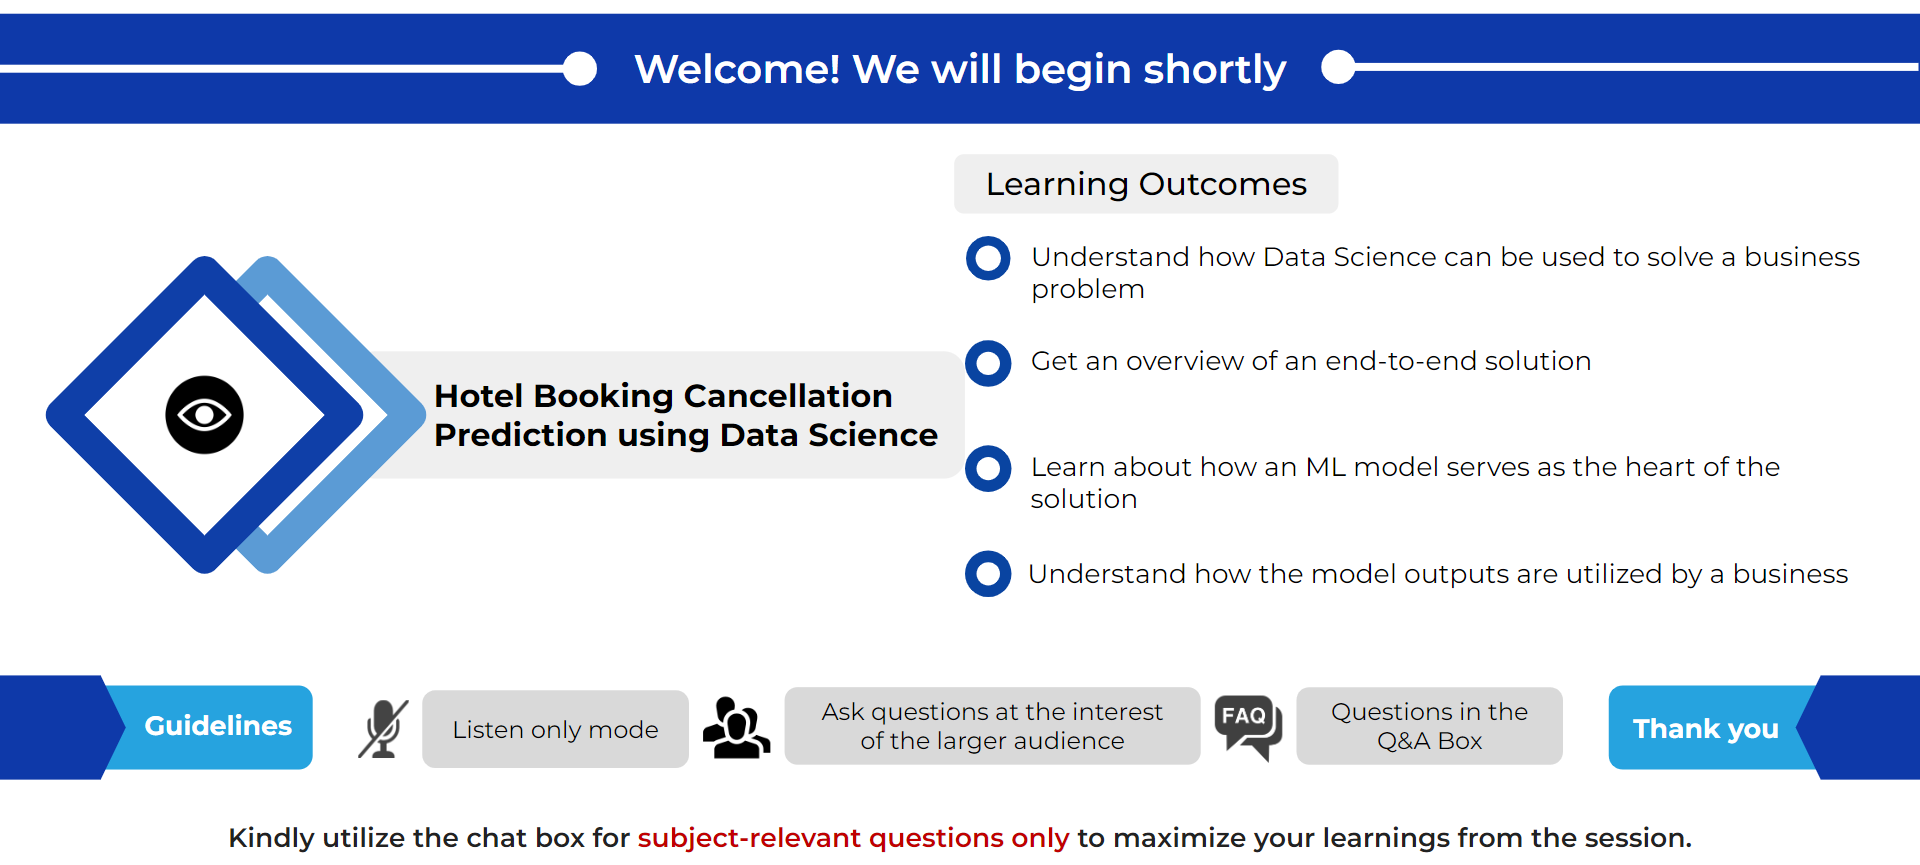

## **Key Points to Note**

- The objective of this week is to **<font color='blue'>experience how businesses use Data Science</font>** with tools & technologies involved to solve problems

- The outcome of this week is not to understand the tiny details like codes and syntax, but to **<font color='blue'>focus on how an end-to-end Data Science solution works</font>**, the methods, and the final output/results

- Do not worry about the details of how something was created - **<font color='blue'>you will learn the concepts demonstrated over the duration of this program</font>**

- Think of this week as a preview of what you will be capable of doing at the end of this program

# **Problem**

**A chain of hotels, INN Hotels Group, is facing a problem of inventory loss due to booking cancellations, resulting in revenue loss. They want your help to build a Data Science solution that will help them predict the likelihood of a booking getting canceled so that they can take measures to fill in potential vacancies.**

# **Data Science Solution Workflow**

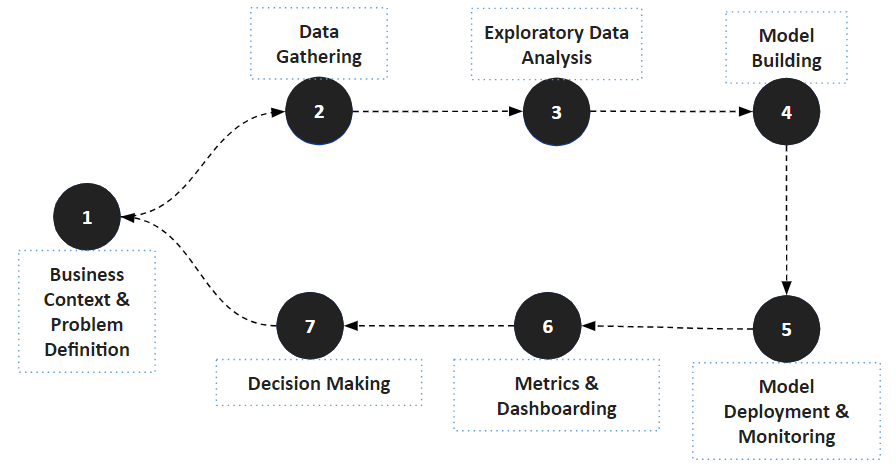

# **Business Context and Problem Definition**

## Business Context

With the increasing popularity and ease of access to online hotel booking platforms, customers tend to make reservations in advance to avoid any last-minute rush and higher prices. These online platforms offer flexible cancellation options, in some cases even a day before reservation. To compete with this, even offline bookings have increased the flexibility in cancellations. This has led to an increase in the growing number of cancellations, with one of the primary reasons being last-minute changes in travel plans. These sudden changes can result from unforeseen circumstances, such as personal emergencies, flight delays, or unexpected events at the travel destination.

Hotel booking cancellations become a crucial problem to solve as it leads to revenue loss and operational inefficiencies. The cancellation of bookings impacts a hotel on various fronts:

1. Loss of revenue when the hotel cannot resell the room

2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms

3. Lowering prices last minute, so the hotel can resell a room, resulting in reduced profit margins

## Problem Definition

The INN Hotels Group has been contending with the challenge of rising cancellations for nearly a year now. However, the last three months witnessed a **rise in inventory loss due to cancellation rise to an all-time high of 18%**. This has led to a jump in the **revenue loss to an all-time high of approx. \$0.25 million annually**. This has significantly impacted their profit margins.

- In the current context, inventory refers to a hotel room, and the inability to sell one leads to inventory loss

The group has been using heuristic mechanisms (rule and domain expert-based) to try and reduce the revenue loss due to cancellations, but this hasn't been effective so far hasn't been effective (neither efficient nor scalable), as evident from the magnitude of losses they are incurring.

The group has decided that they **need a Data Science-based solution to predict the likelihood of a booking being canceled** as they expect it to be more effective than their current mechanism. They hope that this proactive approach will help them significantly **minimize revenue loss and improve operational efficiency**.

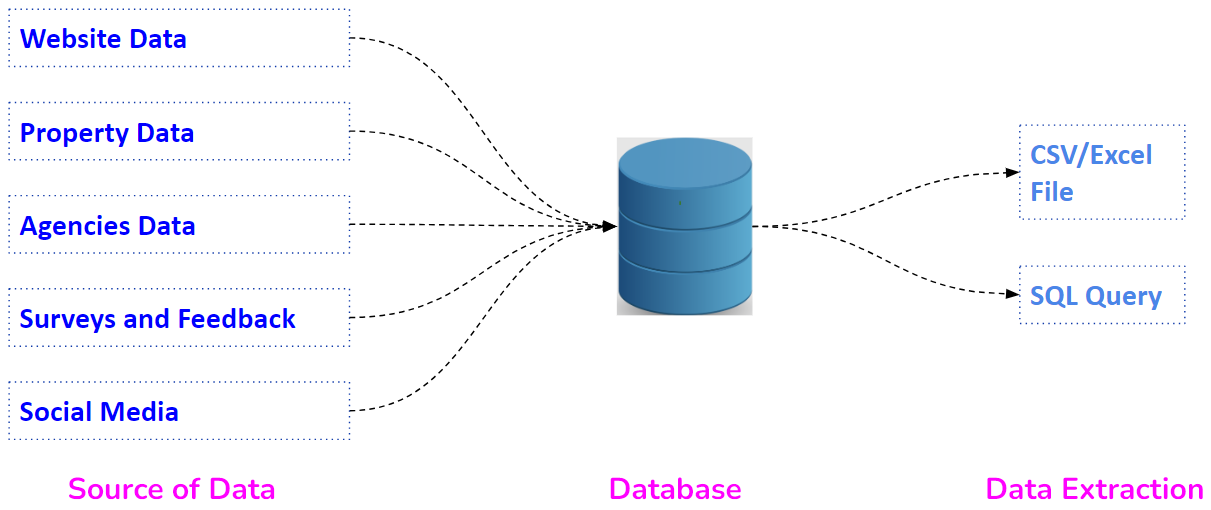

**The data needed for buidling any Data Science solution is usually obtained from multiple sources.**

In the current scenario, we have the following sources:

1. **Website Data**: This includes information such as website traffic, user interactions, clickstream data, user demographics, and browsing behavior.

2. **Property Data**: This includes information such as the number of rooms, type of rooms (e.g., single, double, suite), facilities provided (e.g., Wi-Fi, parking, swimming pool), amenities, location details, and any additional property-specific attributes.

3. **Agencies Data**: This comprises reservation details (e.g., check-in and check-out dates, booking ID), guest profile information (e.g., name, contact details, preferences), cancellation requests, room prices, payment information, and any other relevant data related to the interactions between the property and booking agencies or platforms.

4. **Surveys and Feedbacks**: This refers to data obtained through customer surveys, feedback forms, and online reviews, which provide insights into customer satisfaction, preferences, and suggestions for improvement.

5. **Social Media**: This encompasses data collected from various social media platforms such as Facebook, Twitter, Instagram, and LinkedIn, including user posts, comments, likes, shares, and other interactions.

The data from different sources are collected and stored in an organized and secure manner in databases. Databases are made up of tables, which are collections of data organized into rows and columns. The rows represent individual records, and the columns represent the different attributes that make up each record. For example, a table of customer records might have columns for the customer's name, address, phone number, email address, and more.

Once the data is stored in the databases, we can extract necessary data in multiple ways.

1. **Export as CSV/Excel File**: This method allows for exporting a selected subset or the entire dataset in a CSV (Comma-Separated Values) or Excel file format, which can be easily opened and analyzed using spreadsheet software or using programming languages like Python.

2. **Querying from the database**: This involves running SQL (Structured Query Language) queries on the database to retrieve specific data based on predefined conditions, allowing for more targeted and customized data extraction for analysis or reporting purposes. The SQL queries can be executed using programming languages like Python by establishing a connection to the database.

#### **For the scope of this session, we are going to export a sample of the entire data to showcase the end-to-end solution.**
- The sample data was obtained by taking specific attributes from website data, agencies data, and property data and collating them together
- **We'll load the data sample into a Python notebook for illustration.**


# Import Necessary Libraries

In [1]:
# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,cohen_kappa_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score,LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier,VotingRegressor,StackingClassifier,StackingRegressor
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)
# libraries to deploy the ML model
import os
import joblib
import pickle

# Load The Data

In [2]:
pastdata=pd.read_csv('INNHotelsGroup_pastdata.csv')
newdata=pd.read_csv('INNHotelsGroup_newdata.csv')
pastdata

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...,...
27088,INNHG_128122,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled,Yes
27089,INNHG_128123,11,Online,1,139.00,2,0,2022-06-30,0,3,Canceled,No
27090,INNHG_128124,35,Online,0,117.90,2,0,2022-06-30,0,3,Canceled,No
27091,INNHG_128125,68,Online,1,131.40,2,0,2022-06-30,0,2,Canceled,No


In [3]:
newdata

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled
...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,Canceled
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,Canceled
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,Canceled
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,Canceled


In [4]:
# we are setting booking Id as index in pastdata and newdata
pastdata.set_index('booking_id',inplace=True)
newdata.set_index('booking_id',inplace=True)

In [5]:
pastdata

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
booking_id,,,,,,,,,,,
INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...
INNHG_128122,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled,Yes
INNHG_128123,11,Online,1,139.00,2,0,2022-06-30,0,3,Canceled,No
INNHG_128124,35,Online,0,117.90,2,0,2022-06-30,0,3,Canceled,No


In [6]:
print(f'Past data --> rows = {pastdata.shape[0]} , columns = {pastdata.shape[1]}')

Past data --> rows = 27093 , columns = 11


In [7]:
print(f'New data --> rows = {newdata.shape[0]} , columns = {newdata.shape[1]}')

New data --> rows = 3583 , columns = 10


# Lets use past data to do Exploratory Data Analysis(EDA)

## Data Exploration

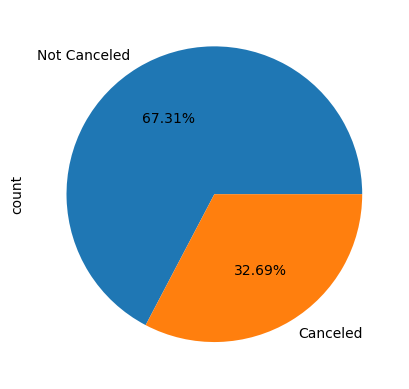

In [8]:
# Let's explore how many cancelled bookings were rebooked
# How many bookings were cancelled
pastdata['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

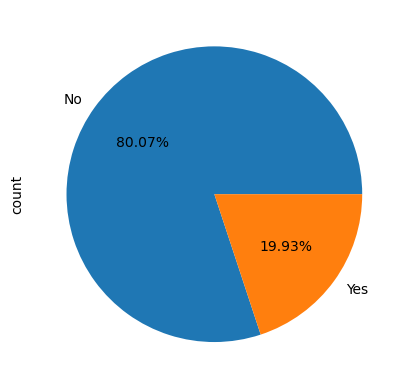

In [9]:
pastdata[pastdata['booking_status']=='Canceled']['rebooked'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

`Inference`: Out of total bookings made from 1/1/2021 to 30/6/2022 , `~33%` bookings were canceled. Out of these canceled booking `~20%` were rebooked while `~80%` bookings were inventory loss.


In [10]:
# we can drop the column rebooked as its not required in predictive modelling
pastdata.drop(columns='rebooked',inplace=True)

## Univariate Analysis

In [11]:
pastdata.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'arrival_date', 'required_car_parking_space', 'no_of_week_nights',
       'booking_status'],
      dtype='object')

In [12]:
num_cols=['lead_time','avg_price_per_room']

In [13]:
cat_cols=['market_segment_type', 'no_of_special_requests','no_of_adults', 'no_of_weekend_nights',
          'required_car_parking_space', 'no_of_week_nights','booking_status']

In [14]:
pastdata['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    13015
1     7498
2     6350
3       98
4       84
5       29
6       19
Name: count, dtype: int64

### Numerical Analysis

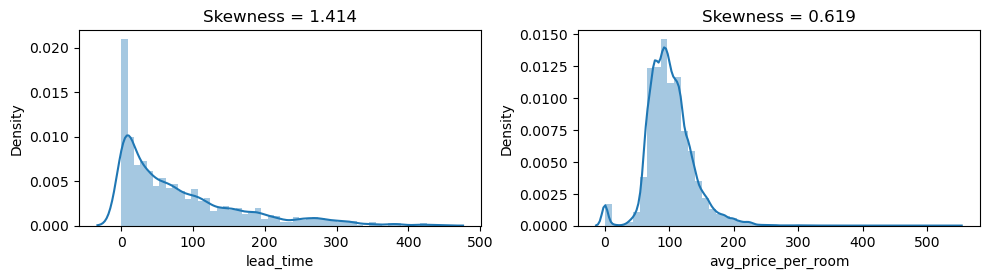

In [15]:
t=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(pastdata[i])
    plt.title(f'Skewness = {round(pastdata[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

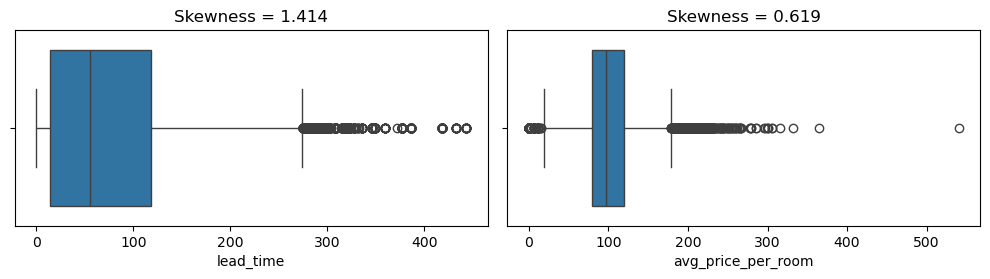

In [16]:
t=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(pastdata[i],orient='h')
    plt.title(f'Skewness = {round(pastdata[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

`Inference`: 
* There is postive skewness in `lead_time` and `avg_price_per_rooms` .
* AS in boxplot we can see that this skewness is 
because of `extreme outliers` present in `upper tail`.

### Categorical Analysis

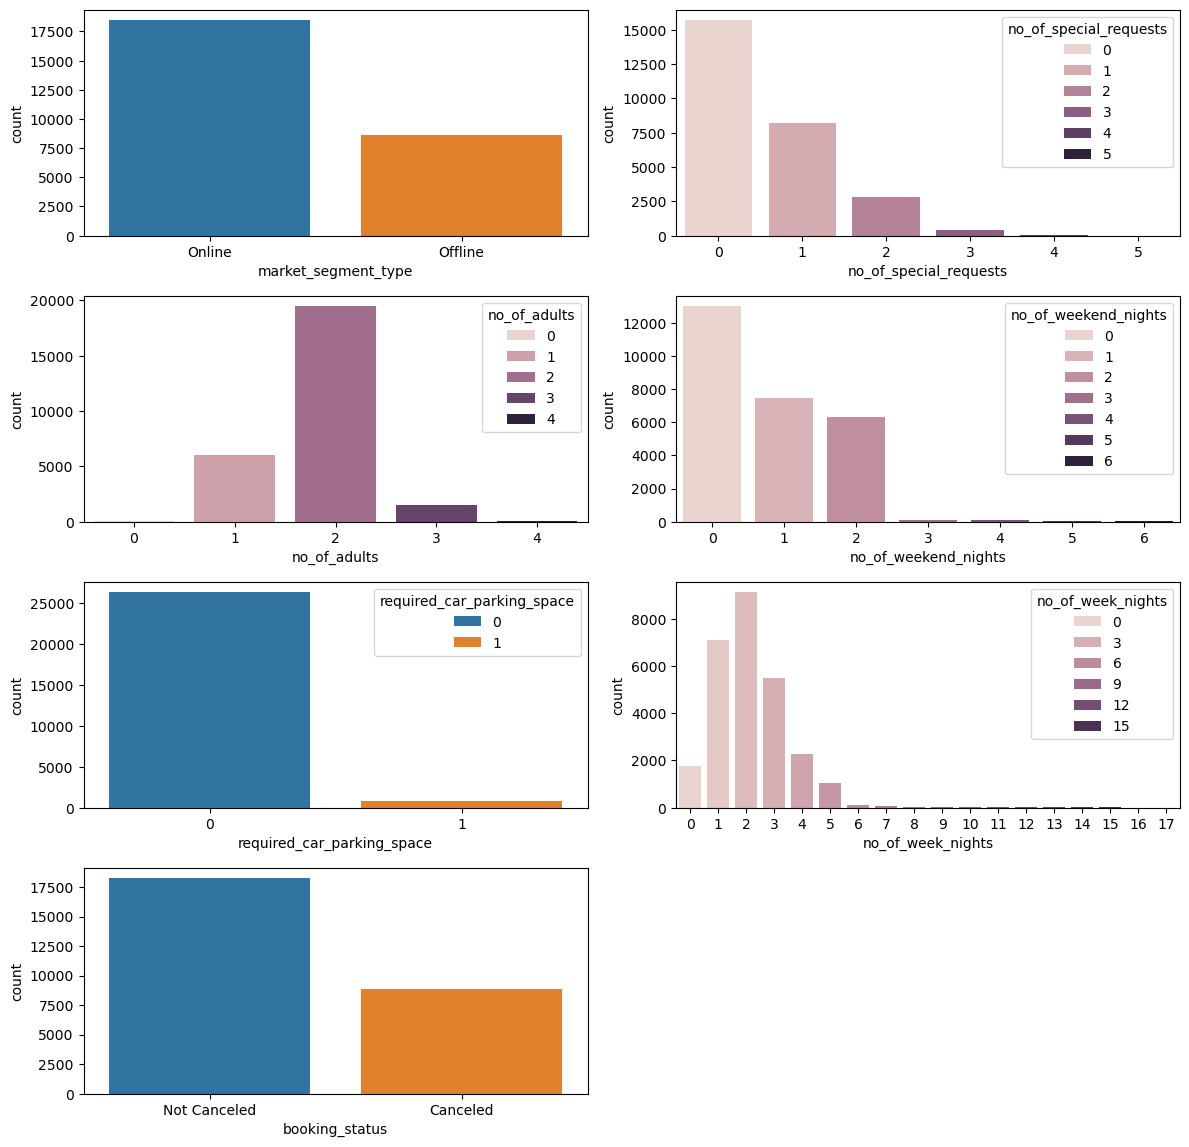

In [17]:
t=1
plt.figure(figsize=(12,14))
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(data=pastdata,x=i,hue=i)
    t=t+1
plt.tight_layout()
plt.show()

`Inference`:
* most of booking are `online`
* most of the guest `does not have special reqirements of car parking`
* most of booking made for `2 adults`
* most of booking include `0,1,2 weekend nights` & `1,2,3 weeknights`

## Bivariate Analysis

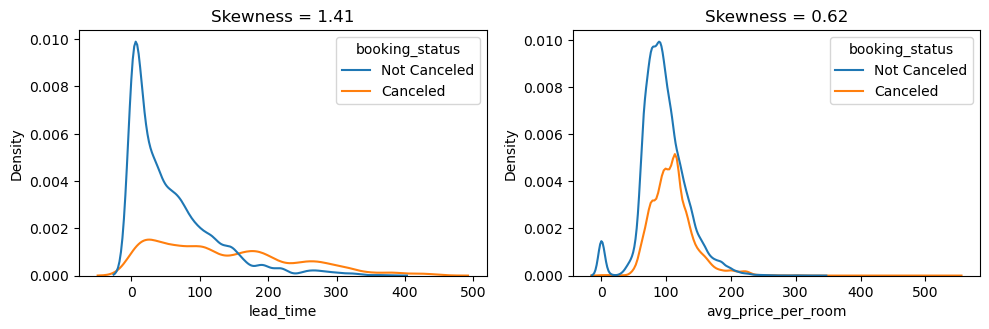

In [18]:
t=1
plt.figure(figsize=(10,6))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=pastdata,x=i,hue='booking_status')
    plt.title(f'Skewness = {round(pastdata[i].skew(),2)}')
    t=t+1
plt.tight_layout()
plt.show()

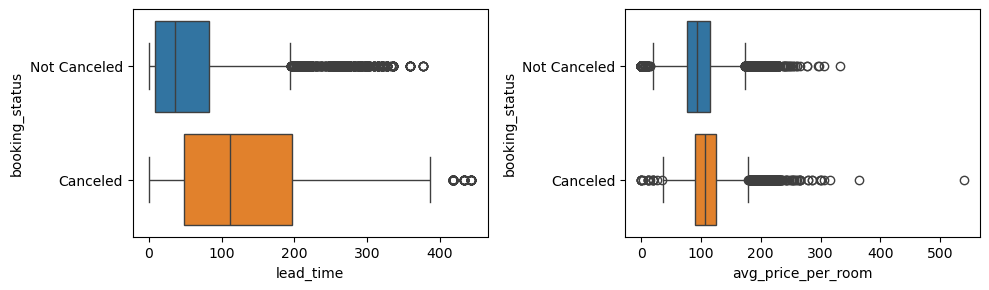

In [19]:
t=1
plt.figure(figsize=(10,14))
for i in num_cols:
    plt.subplot(5,2,t)
    sns.boxplot(data=pastdata,x=i,y=pastdata['booking_status'],hue='booking_status')
    t=t+1 
plt.tight_layout()
plt.show()

`Inference`:
* Bookings with Larger lead times are more prone to cancel
* There are extreme outliers in avg price per room
* Booking with lead time geater than 400 are more prone to get canceled
* Booking of avg room price greater than 350 is canceled

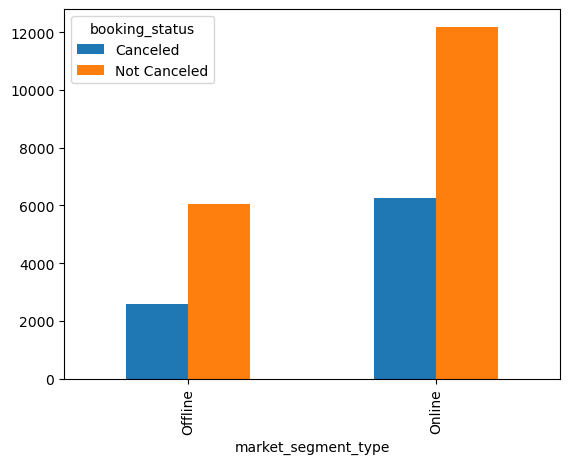

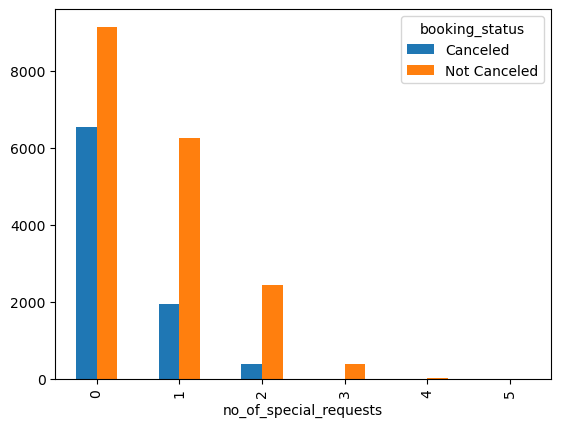

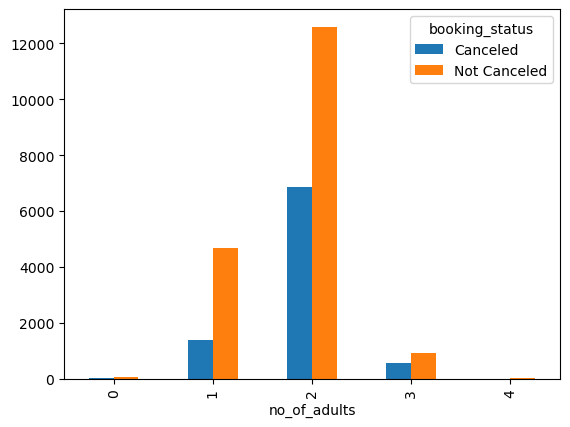

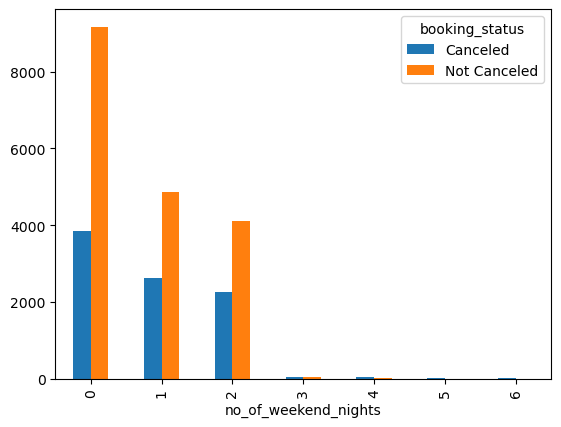

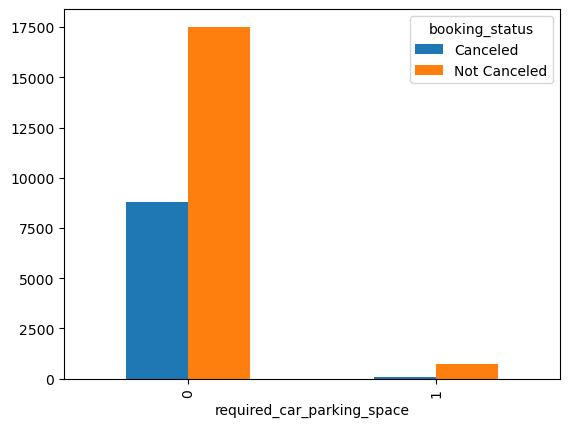

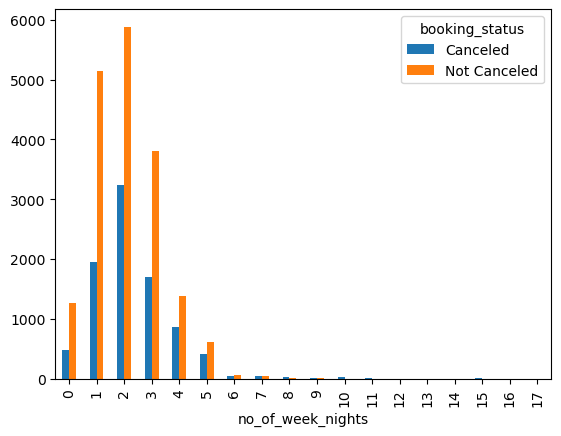

In [20]:
for i in cat_cols:
    if i!='booking_status':
        pd.crosstab(index=pastdata[i],columns=pastdata['booking_status']).plot(kind='bar')
plt.show()

## Inferential Statistics

In [21]:
# To test bookings with larger lead time are more prone to get canceled
# mu1 : avg lead time of canceled bookings
# mu2: avg lead time of not canceled bookings
# Ho: mu1>=mu2
# Ha: mu1<mu2

sampl1=pastdata[pastdata['booking_status']=='Canceled']['lead_time']
sampl2=pastdata[pastdata['booking_status']=='Not Canceled']['lead_time']
# check for assumptions
# Asssumption 1 : Normality
print(stats.shapiro(sampl1))
print(stats.shapiro(sampl2))
# Assumption 2 : Equal Variances
print(stats.levene(sampl1,sampl2))
# The data fails both the assumptions so we will apply some other non parametric test

ShapiroResult(statistic=0.9387743609879114, pvalue=4.865435517353332e-51)
ShapiroResult(statistic=0.8214888949700189, pvalue=7.235137959871973e-88)
LeveneResult(statistic=3210.120590252021, pvalue=0.0)


In [22]:
# Mannwitneyu test
t_stats,p_value=stats.mannwhitneyu(sampl1,sampl2,alternative='less')
print(f't_stats = {t_stats},p_value = {p_value}')
# with 95% confidence level 
if p_value>0.05:
    print('Fail to reject Ho')
else:
    print('Reject Ho')

t_stats = 120987681.5,p_value = 1.0
Fail to reject Ho


# Data Preprocessing

## Check for defects 

In [23]:
# Missing values in pastdata and newdata
pastdata.isnull().sum().sum()

0

In [24]:
newdata.isnull().sum().sum()

0

In [25]:
# Check for duplicated in pastdata
pastdata[pastdata.duplicated()]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_101079,12,Offline,1,85.00,1,1,2021-01-01,0,0,Not Canceled
INNHG_101094,12,Offline,1,85.00,1,1,2021-01-01,0,0,Not Canceled
INNHG_101097,36,Online,0,110.00,1,2,2021-01-01,0,3,Not Canceled
INNHG_101098,231,Online,1,100.30,2,2,2021-01-01,0,2,Canceled
INNHG_101109,61,Online,1,149.40,2,2,2021-01-01,0,3,Not Canceled
...,...,...,...,...,...,...,...,...,...,...
INNHG_128113,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled
INNHG_128115,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled
INNHG_128118,113,Offline,0,85.00,2,1,2022-06-30,0,3,Canceled


In [26]:
pastdata.drop_duplicates(inplace=True)

In [27]:
pastdata.shape

(18655, 10)

### Capping the outliers from the data

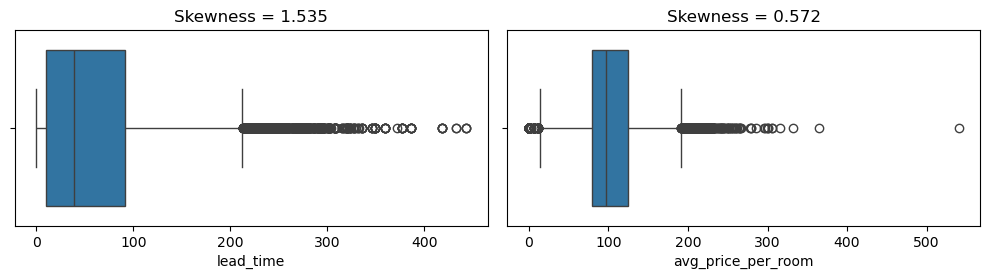

In [28]:
t=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(pastdata[i],orient='h')
    plt.title(f'Skewness = {round(pastdata[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

In [29]:
for i in num_cols:
    q3,q1=np.percentile(pastdata[i],[75,25])
    iqr=q3-q1
    ul,ll=q3+2*iqr,q1-2*iqr
    pastdata[i]=pastdata[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

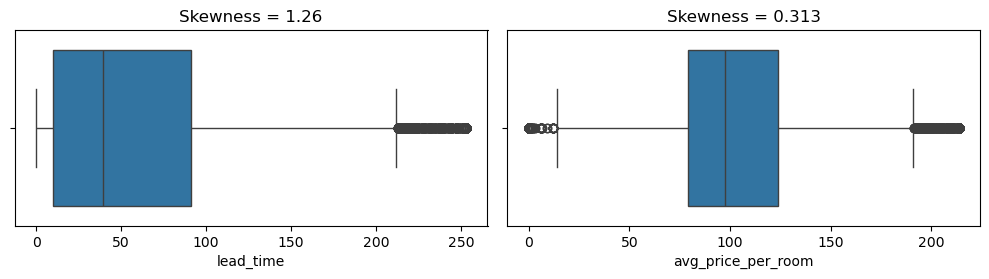

In [30]:
t=1
plt.figure(figsize=(10,5))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(pastdata[i],orient='h')
    plt.title(f'Skewness = {round(pastdata[i].skew(),3)}')
    t=t+1
plt.tight_layout()
plt.show()

# Feature Enginnering

In [31]:
pastdata['arrival_date']=pd.to_datetime(pastdata['arrival_date'])
pastdata['arrival_Day']=pastdata['arrival_date'].dt.day
pastdata['arrival_Month']=pastdata['arrival_date'].dt.month
pastdata['arrival_Weekday']=pastdata['arrival_date'].dt.weekday
newdata['arrival_date']=pd.to_datetime(newdata['arrival_date'])
newdata['arrival_Day']=newdata['arrival_date'].dt.day
newdata['arrival_Month']=newdata['arrival_date'].dt.month
newdata['arrival_Weekday']=newdata['arrival_date'].dt.weekday

In [32]:
pastdata.drop(columns='arrival_date',inplace=True)

In [33]:
newdata.drop(columns='arrival_date',inplace=True)

In [34]:
pastdata.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_Day,arrival_Month,arrival_Weekday
booking_id,,,,,,,,,,,,
INNHG_101034,0.00,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
INNHG_101035,34.00,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
INNHG_101036,24.00,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
INNHG_101037,23.00,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
INNHG_101038,46.00,Online,1,149.40,2,2,0,3,Canceled,1,1,4


In [35]:
newdata.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_Day,arrival_Month,arrival_Weekday
booking_id,,,,,,,,,,,,
INNHG_128127,4,Online,1,103.00,1,0,1,1,Not Canceled,1,7,4
INNHG_128128,147,Online,2,103.70,2,2,0,2,Not Canceled,1,7,4
INNHG_128129,43,Online,1,126.90,2,1,1,2,Not Canceled,1,7,4
INNHG_128130,145,Offline,0,72.76,2,0,0,1,Not Canceled,1,7,4
INNHG_128131,86,Offline,1,107.69,2,1,0,2,Not Canceled,1,7,4


# Encoding

In [36]:
pastdata.dtypes

lead_time                     float64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
arrival_Day                     int32
arrival_Month                   int32
arrival_Weekday                 int32
dtype: object

**Encode of market segment**

In [37]:
pastdata['market_segment_type']=pastdata['market_segment_type'].map({'Online':1,'Offline':0})

In [38]:
newdata['market_segment_type']=newdata['market_segment_type'].map({'Online':1,'Offline':0})

**Encode of booking status**

In [39]:
pastdata['booking_status']=pastdata['booking_status'].map({'Canceled':1,'Not Canceled':0})
newdata['booking_status']=newdata['booking_status'].map({'Canceled':1,'Not Canceled':0})

In [40]:
pastdata.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_Day,arrival_Month,arrival_Weekday
booking_id,,,,,,,,,,,,
INNHG_101034,0.00,1,0,85.03,1,1,0,0,0,1,1,4
INNHG_101035,34.00,1,2,125.10,2,2,0,0,0,1,1,4
INNHG_101036,24.00,1,1,71.69,2,2,0,0,0,1,1,4
INNHG_101037,23.00,1,0,84.70,1,2,0,0,0,1,1,4
INNHG_101038,46.00,1,1,149.40,2,2,0,3,1,1,1,4


# Train Test Split

In [41]:
y_train=pastdata['booking_status']
x_train=pastdata.drop(columns='booking_status')
y_test=newdata['booking_status']
x_test=newdata.drop(columns='booking_status')

In [42]:
print(x_train.shape , x_test.shape ,y_train.shape ,y_test.shape)

(18655, 11) (3583, 11) (18655,) (3583,)


In [43]:
x_train.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_Day,arrival_Month,arrival_Weekday
booking_id,,,,,,,,,,,
INNHG_101034,0.00,1,0,85.03,1,1,0,0,1,1,4
INNHG_101035,34.00,1,2,125.10,2,2,0,0,1,1,4
INNHG_101036,24.00,1,1,71.69,2,2,0,0,1,1,4
INNHG_101037,23.00,1,0,84.70,1,2,0,0,1,1,4
INNHG_101038,46.00,1,1,149.40,2,2,0,3,1,1,4


# Predictive Modelling

In [44]:
mod = []
accu = []
rec = []
pre = []
f1 = []
ckap = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
    
    print(f"confusion_matrix :\n  {confusion_matrix(ytest,pred_h)}")
    print(f"\nclassifiaction report:\n {classification_report(ytest,pred_h)}")

    fpr,tpr,thres = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='r')
    plt.title(f'ROC AUC = {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()

    ans = input('Do you want to save the result? Y/N')
    if ans.lower()=='y':
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        pre.append(precision_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        ckap.append(cohen_kappa_score(ytest,pred_h))
        global scorecard
        scorecard = pd.DataFrame({'Model':mod,'Accuracy':accu,'Precesion':pre,'Recall':rec,
                                 'F1 Score':f1,'Cohen Kappa':ckap})
    else:
        return

In [45]:
def tuning_parameters(grid,estimator,x,y,score = 'f1'):
    gscv=GridSearchCV(estimator=estimator,param_grid=grid,verbose=0,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

## Class Weights

In [46]:
y_train.value_counts(normalize=True)

booking_status
0   0.71
1   0.29
Name: proportion, dtype: float64

In [47]:
weights = y_train.shape[0]/(2*y_train.value_counts())[0] , y_train.shape[0]/(2*y_train.value_counts())[1]

In [48]:
weights_dict = {k:v for k,v in zip(range(2),weights)}
weights_dict

{0: 0.7029012810851545, 1: 1.7321262766945218}

## Logistic Regression

confusion_matrix :
  [[2162  221]
 [ 576  624]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84      2383
           1       0.74      0.52      0.61      1200

    accuracy                           0.78      3583
   macro avg       0.76      0.71      0.73      3583
weighted avg       0.77      0.78      0.77      3583



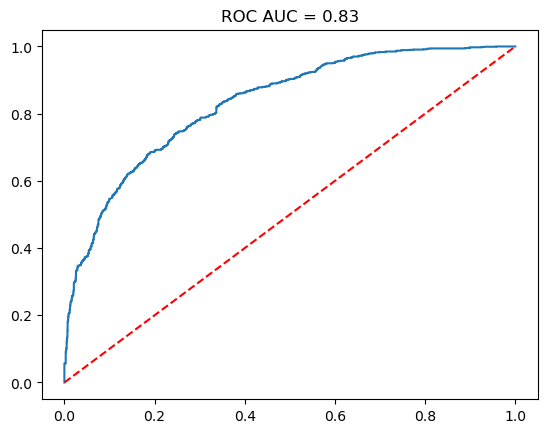

Do you want to save the result? Y/N y


In [49]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [50]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46


**with class weights**

confusion_matrix :
  [[1742  641]
 [ 289  911]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      2383
           1       0.59      0.76      0.66      1200

    accuracy                           0.74      3583
   macro avg       0.72      0.75      0.73      3583
weighted avg       0.77      0.74      0.75      3583



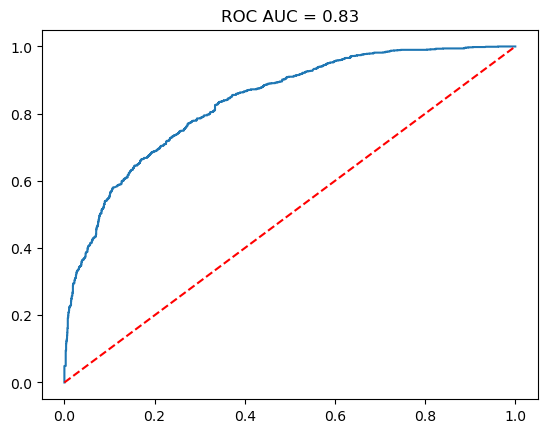

Do you want to save the result? Y/N y


In [51]:
model_validation(LogisticRegression(class_weight=weights_dict),x_train,y_train,x_test,y_test)

In [52]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46


## Naive Bayes

confusion_matrix :
  [[1870  513]
 [ 439  761]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      2383
           1       0.60      0.63      0.62      1200

    accuracy                           0.73      3583
   macro avg       0.70      0.71      0.71      3583
weighted avg       0.74      0.73      0.74      3583



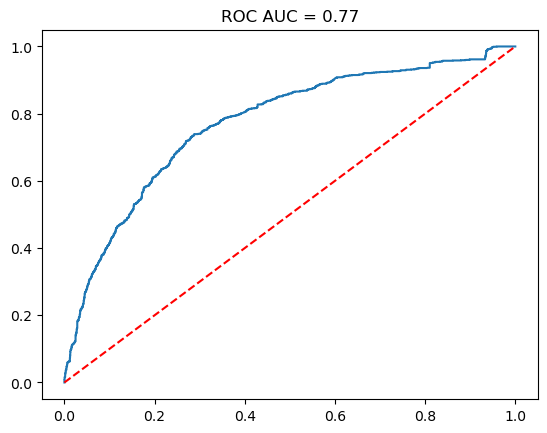

Do you want to save the result? Y/N y


In [53]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

In [54]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41


confusion_matrix :
  [[1434  949]
 [ 333  867]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69      2383
           1       0.48      0.72      0.57      1200

    accuracy                           0.64      3583
   macro avg       0.64      0.66      0.63      3583
weighted avg       0.70      0.64      0.65      3583



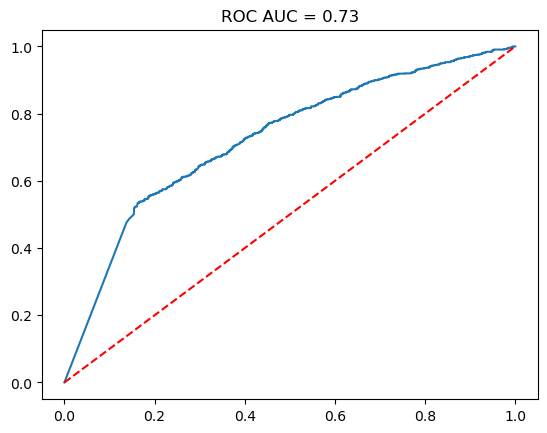

Do you want to save the result? Y/N y


In [55]:
model_validation(MultinomialNB(),x_train,y_train,x_test,y_test)

In [56]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29


## Decison Tree

In [57]:
best_dt=tuning_parameters(grid={'max_depth':[3,4,5,6,7,8,9,10]},estimator=DecisionTreeClassifier(),x=x_train,y=y_train)

confusion_matrix :
  [[2041  342]
 [ 376  824]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      2383
           1       0.71      0.69      0.70      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.77      0.77      3583
weighted avg       0.80      0.80      0.80      3583



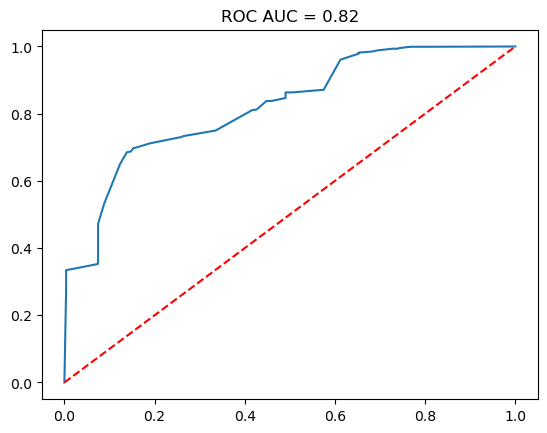

Do you want to save the result? Y/N y


In [58]:
model_validation(DecisionTreeClassifier(**best_dt),x_train,y_train,x_test,y_test)

In [59]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55


**with class weights**

confusion_matrix :
  [[1803  580]
 [ 203  997]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      2383
           1       0.63      0.83      0.72      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.79      0.77      3583
weighted avg       0.81      0.78      0.79      3583



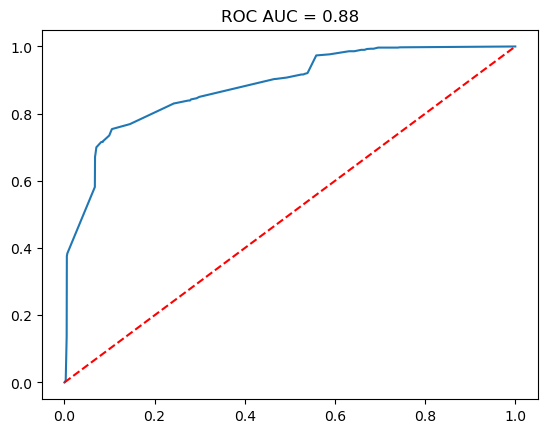

Do you want to save the result? Y/N y


In [60]:
model_validation(DecisionTreeClassifier(**best_dt,class_weight=weights_dict),x_train,y_train,x_test,y_test)

In [61]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54


## Random Forest

In [62]:
best_rf=tuning_parameters(grid={'max_depth':[3,4,5,6,7],'n_estimators':[80,100,120]}
                         ,estimator=RandomForestClassifier(max_features=None),x=x_train,y=y_train)

In [63]:
best_rf

{'max_depth': 7, 'n_estimators': 80}

confusion_matrix :
  [[2251  132]
 [ 426  774]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2383
           1       0.85      0.65      0.74      1200

    accuracy                           0.84      3583
   macro avg       0.85      0.79      0.81      3583
weighted avg       0.85      0.84      0.84      3583



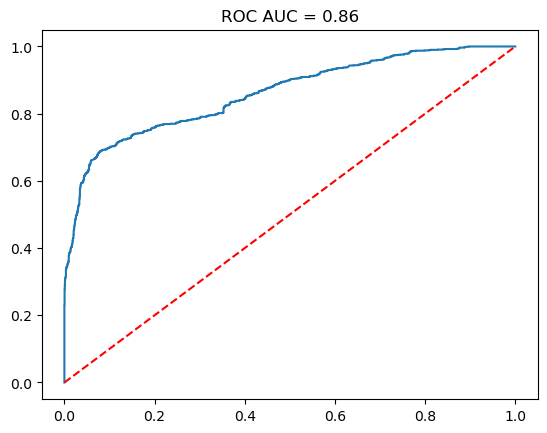

Do you want to save the result? Y/N y


In [64]:
model_validation(RandomForestClassifier(**best_rf),x_train,y_train,x_test,y_test)

In [65]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63


**with class weights**

confusion_matrix :
  [[1965  418]
 [ 285  915]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      2383
           1       0.69      0.76      0.72      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.79      0.79      3583
weighted avg       0.81      0.80      0.81      3583



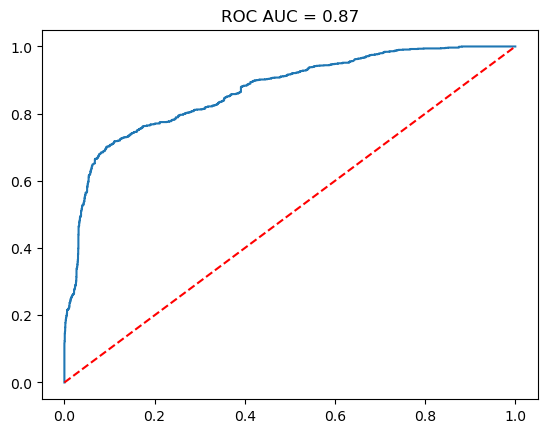

Do you want to save the result? Y/N y


In [66]:
model_validation(RandomForestClassifier(**best_rf,class_weight=weights_dict),x_train,y_train,x_test,y_test)

In [67]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57


## Ada Boost

In [68]:
best_ada = tuning_parameters(grid={'n_estimators':[50,70,100,120,150],'learning_rate':[0.1,0.5]},
                            estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight=weights_dict)),
                                x=x_train,y=y_train)

confusion_matrix :
  [[2025  358]
 [ 349  851]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2383
           1       0.70      0.71      0.71      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.78      0.78      3583
weighted avg       0.80      0.80      0.80      3583



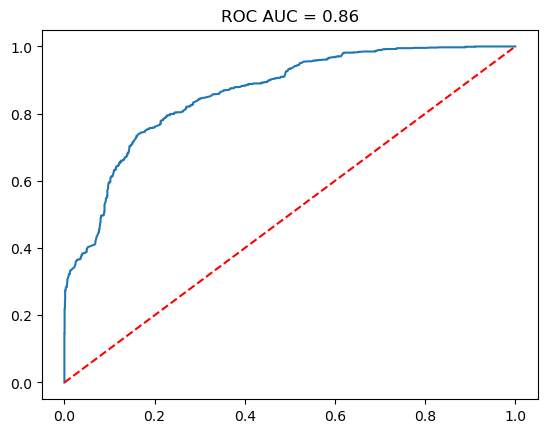

Do you want to save the result? Y/N y


In [69]:
model_validation(AdaBoostClassifier(**best_ada),x_train,y_train,x_test,y_test)

In [70]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56


## Gradient Boost

In [71]:
best_gbm = tuning_parameters(grid={'n_estimators':[50,70,100,120,150],'learning_rate':[0.1,0.5],'max_depth':[3,5,7]},
                            estimator=GradientBoostingClassifier(),x=x_train,y=y_train)

In [72]:
best_gbm

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

confusion_matrix :
  [[2143  240]
 [ 319  881]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      2383
           1       0.79      0.73      0.76      1200

    accuracy                           0.84      3583
   macro avg       0.83      0.82      0.82      3583
weighted avg       0.84      0.84      0.84      3583



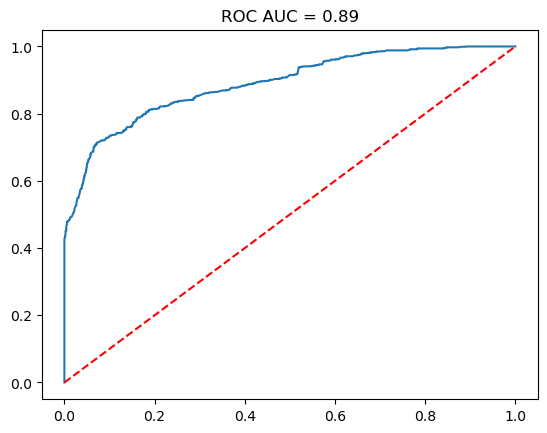

Do you want to save the result? Y/N y


In [73]:
model_validation(GradientBoostingClassifier(**best_gbm),x_train,y_train,x_test,y_test)

In [74]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56
9,GradientBoostingClassifier(n_estimators=50),0.84,0.79,0.73,0.76,0.64


## XG Boost

In [75]:
best_xgb =  tuning_parameters(grid={'n_estimators':[50,70,100,120,150],'learning_rate':[0.1,0.5],'gamma':[1,2,3]},
                            estimator=XGBClassifier(),x=x_train,y=y_train)

confusion_matrix :
  [[2026  357]
 [ 305  895]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      2383
           1       0.71      0.75      0.73      1200

    accuracy                           0.82      3583
   macro avg       0.79      0.80      0.79      3583
weighted avg       0.82      0.82      0.82      3583



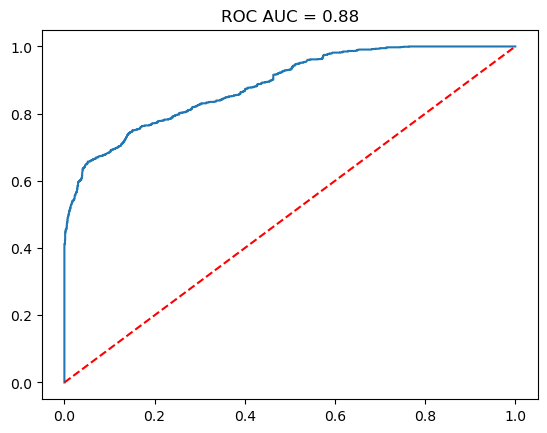

Do you want to save the result? Y/N y


In [76]:
model_validation(XGBClassifier(**best_xgb),x_train,y_train,x_test,y_test)

In [77]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56
9,GradientBoostingClassifier(n_estimators=50),0.84,0.79,0.73,0.76,0.64


## Voting

In [78]:
base_estimators = [('DT',DecisionTreeClassifier(**best_dt,class_weight=weights_dict)),
                  ('RF',RandomForestClassifier(**best_rf,class_weight=weights_dict)),
                  ('GBM',GradientBoostingClassifier(**best_gbm)),
                  ('XGB',XGBClassifier(**best_xgb))] 

confusion_matrix :
  [[2113  270]
 [ 294  906]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      2383
           1       0.77      0.76      0.76      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.82      0.82      3583
weighted avg       0.84      0.84      0.84      3583



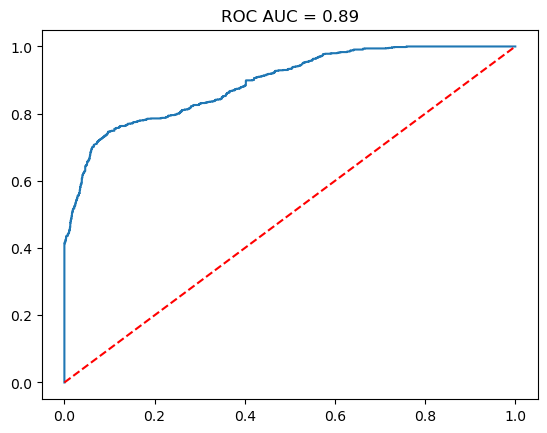

Do you want to save the result? Y/N y


In [79]:
model_validation(VotingClassifier(estimators=base_estimators,voting='soft',weights=(0.8,0.8,1.1,1.2)),
                 x_train,y_train,x_test,y_test)

In [80]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56
9,GradientBoostingClassifier(n_estimators=50),0.84,0.79,0.73,0.76,0.64


## Stacking

confusion_matrix :
  [[2227  156]
 [ 632  568]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      2383
           1       0.78      0.47      0.59      1200

    accuracy                           0.78      3583
   macro avg       0.78      0.70      0.72      3583
weighted avg       0.78      0.78      0.76      3583



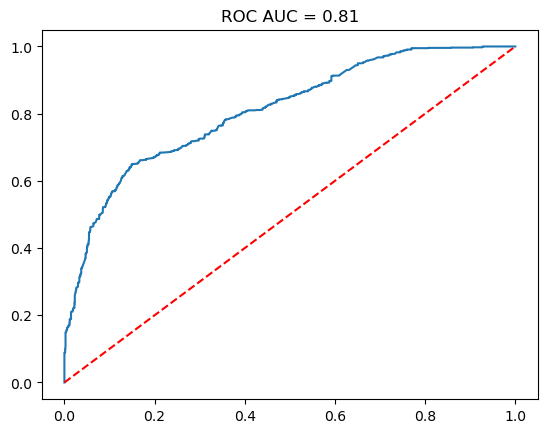

Do you want to save the result? Y/N y


In [82]:
model_validation(StackingClassifier(estimators=base_estimators,
                                    final_estimator=XGBClassifier(max_depth=3,class_weight=weights_dict)),
                x_train,y_train,x_test,y_test)

In [83]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56
9,GradientBoostingClassifier(n_estimators=50),0.84,0.79,0.73,0.76,0.64


## Final Model

In [84]:
best_xgb

{'gamma': 2, 'learning_rate': 0.1, 'n_estimators': 50}

In [85]:
grid = {'gamma':[2,3,4],'learning_rate':[0.5,0.2,0.1,0.09,0.08],'n_estimators':[65,67,70,72,75,80,85,100]}

In [86]:
final_xgb = tuning_parameters(grid=grid,estimator=XGBClassifier(),x=x_train,y=y_train)

In [87]:
final_xgb

{'gamma': 4, 'learning_rate': 0.1, 'n_estimators': 70}

confusion_matrix :
  [[1997  386]
 [ 304  896]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      2383
           1       0.70      0.75      0.72      1200

    accuracy                           0.81      3583
   macro avg       0.78      0.79      0.79      3583
weighted avg       0.81      0.81      0.81      3583



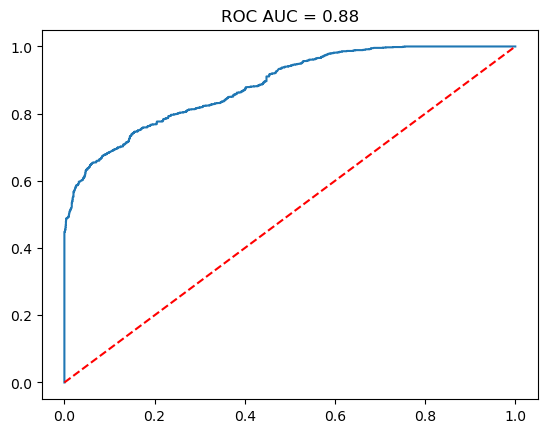

Do you want to save the result? Y/N n


In [88]:
model_validation(XGBClassifier(**final_xgb),x_train,y_train,x_test,y_test)

In [89]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56
9,GradientBoostingClassifier(n_estimators=50),0.84,0.79,0.73,0.76,0.64


In [102]:
final_model=XGBClassifier(**best_gbm)

In [103]:
final_model.fit(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

confusion_matrix :
  [[2063  320]
 [ 312  888]]

classifiaction report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2383
           1       0.74      0.74      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



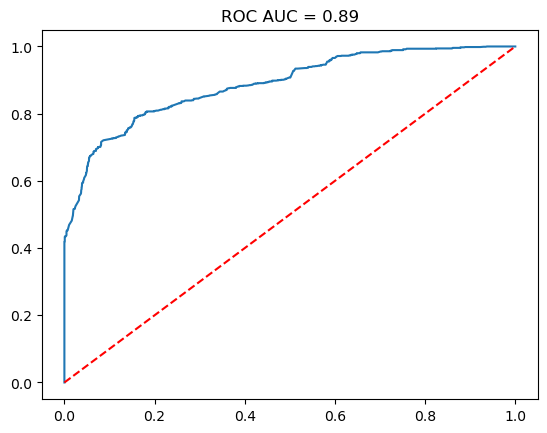

Do you want to save the result? Y/N y


In [104]:
model_validation(final_model,x_train,y_train,x_test,y_test)

In [105]:
scorecard

,Model,Accuracy,Precesion,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.78,0.74,0.52,0.61,0.46
1,LogisticRegression(class_weight={0: 0.70290128...,0.74,0.59,0.76,0.66,0.46
2,GaussianNB(),0.73,0.60,0.63,0.62,0.41
3,MultinomialNB(),0.64,0.48,0.72,0.57,0.29
4,DecisionTreeClassifier(max_depth=7),0.80,0.71,0.69,0.70,0.55
5,DecisionTreeClassifier(class_weight={0: 0.7029...,0.78,0.63,0.83,0.72,0.54
6,"RandomForestClassifier(max_depth=7, n_estimato...",0.84,0.85,0.65,0.74,0.63
7,RandomForestClassifier(class_weight={0: 0.7029...,0.80,0.69,0.76,0.72,0.57
8,AdaBoostClassifier(learning_rate=0.5),0.80,0.70,0.71,0.71,0.56
9,GradientBoostingClassifier(n_estimators=50),0.84,0.79,0.73,0.76,0.64


# Buisness Interpretations

In [106]:
fi = final_model.feature_importances_

In [107]:
fi_data = pd.DataFrame({'Feature Importance':fi},index=x_train.columns)\
.sort_values(by='Feature Importance',ascending=False)

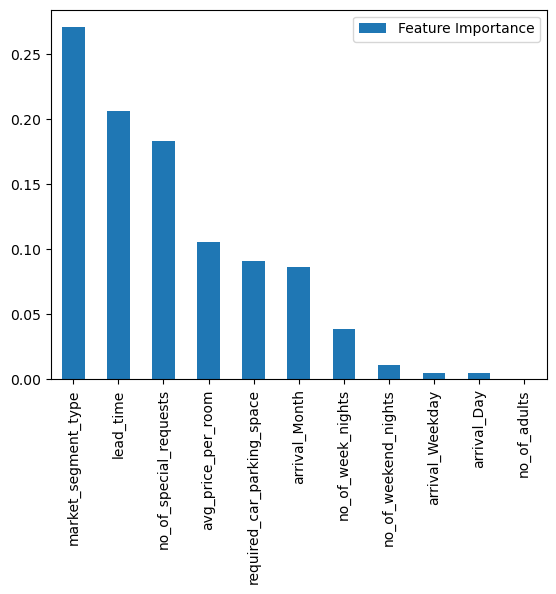

In [108]:
fi_data.plot(kind='bar')
plt.show()

# Deployment

In [109]:
# Save the final model as a pickle file

with open('final_model_XGBoost.pkl','wb') as file:
    pickle.dump(final_model,file)